# GRU - Method 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
data_path = '/content/drive/MyDrive/erdosinstitute/BD_combined_final.csv'  # Path to the uploaded dataset
df = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
print(df.head())

         date  temp_2m_mean  appar_temp_mean  rain_sum  goog_trends  case
0  2008-01-31     22.757732        25.196896  3.820457            2     0
1  2008-02-29     20.662600        21.795855  1.800029            0     0
2  2008-03-31     20.317026        20.951399  0.949409            0     0
3  2008-04-30     22.066017        23.307356  1.117167            0     0
4  2008-05-31     24.750021        27.194162  1.865188            2     0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             192 non-null    object 
 1   temp_2m_mean     192 non-null    float64
 2   appar_temp_mean  192 non-null    float64
 3   rain_sum         192 non-null    float64
 4   goog_trends      192 non-null    int64  
 5   case             192 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 9.1+ KB


In [ ]:
# Ensure the 'date' column is parsed as datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             192 non-null    datetime64[ns]
 1   temp_2m_mean     192 non-null    float64       
 2   appar_temp_mean  192 non-null    float64       
 3   rain_sum         192 non-null    float64       
 4   goog_trends      192 non-null    int64         
 5   case             192 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 9.1 KB


In [ ]:
df.set_index('date', inplace=True)
df

,temp_2m_mean,appar_temp_mean,rain_sum,goog_trends,case
date,,,,,
2008-01-31,22.757732,25.196896,3.820457,2,0
2008-02-29,20.662600,21.795855,1.800029,0,0
2008-03-31,20.317026,20.951399,0.949409,0,0
2008-04-30,22.066017,23.307356,1.117167,0,0
2008-05-31,24.750021,27.194162,1.865188,2,0
...,...,...,...,...,...
2023-08-31,29.021967,34.106457,7.557258,58,71976
2023-09-30,29.130241,34.763794,8.478028,41,79598
2023-10-31,28.639803,34.286575,9.503899,22,67769


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 2008-01-31 to 2023-12-31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp_2m_mean     192 non-null    float64
 1   appar_temp_mean  192 non-null    float64
 2   rain_sum         192 non-null    float64
 3   goog_trends      192 non-null    int64  
 4   case             192 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 9.0 KB


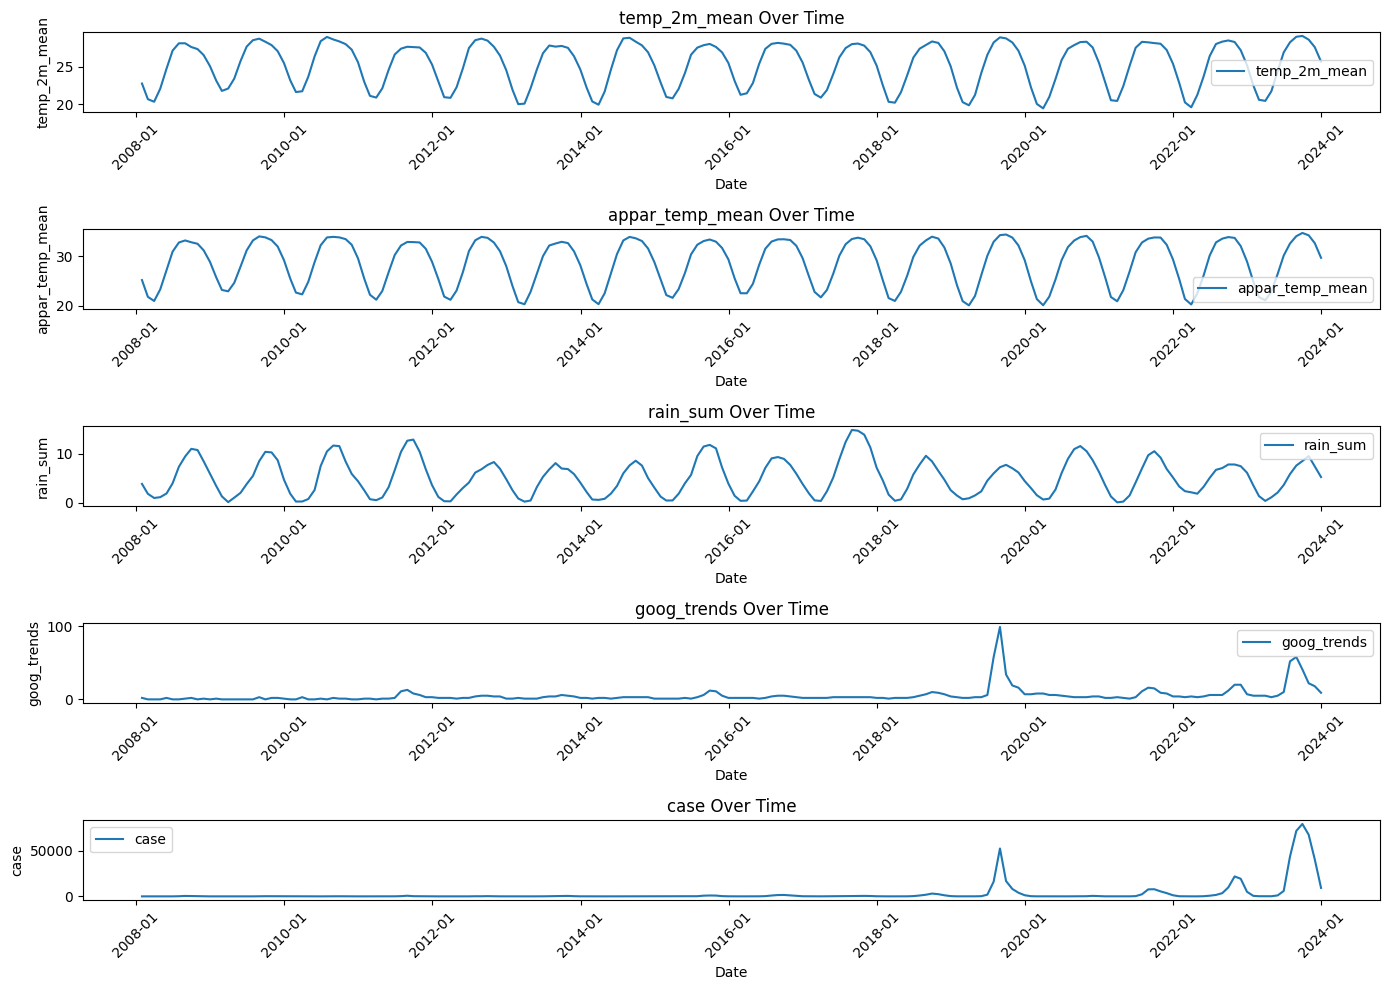

In [ ]:
# List of features to plot
features = ['temp_2m_mean', 'appar_temp_mean', 'rain_sum', 'goog_trends', 'case']

# Create subplots for each feature
plt.figure(figsize=(14, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    plt.plot(df.index, df[feature], label=feature)
    plt.title(f'{feature} Over Time')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# # Handling the date column (assuming it's named 'date')
# # Convert the date column to datetime format and extract year, month, and day
# df['date'] = pd.to_datetime(df['date'])
# df['year'] = df['date'].dt.year
# df['month'] = df['date'].dt.month
# df['day'] = df['date'].dt.day

# # Drop the original date column if not needed
# df = df.drop(columns=['date'])
# df

,temp_2m_mean,appar_temp_mean,rain_sum,goog_trends,case,year,month,day
0,22.757732,25.196896,3.820457,2,0,2008,1,31
1,20.662600,21.795855,1.800029,0,0,2008,2,29
2,20.317026,20.951399,0.949409,0,0,2008,3,31
3,22.066017,23.307356,1.117167,0,0,2008,4,30
4,24.750021,27.194162,1.865188,2,0,2008,5,31
...,...,...,...,...,...,...,...,...
187,29.021967,34.106457,7.557258,58,71976,2023,8,31
188,29.130241,34.763794,8.478028,41,79598,2023,9,30
189,28.639803,34.286575,9.503899,22,67769,2023,10,31
190,27.633633,32.702920,7.383167,18,40716,2023,11,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 2008-01-31 to 2023-12-31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp_2m_mean     192 non-null    float64
 1   appar_temp_mean  192 non-null    float64
 2   rain_sum         192 non-null    float64
 3   goog_trends      192 non-null    int64  
 4   case             192 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 9.0 KB


In [ ]:
# Assuming the 'cases' column is the target, and we'll use other columns as features
# Replace 'cases' with the actual name of the target column in your dataset if different
target_column = 'case'
feature_columns = df.columns.drop([target_column])


# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Convert the normalized data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Prepare the data for GRU
samples = 24  # Number of past time steps to consider
X, Y = [], []
for i in range(samples, len(df_scaled)):
    X.append(df_scaled.iloc[i-samples:i][feature_columns].values)
    Y.append(df_scaled.iloc[i][target_column])

X = np.array(X)
Y = np.array(Y)

# Split the data into training and testing sets
threshold = int(0.8 * len(X))
X_train, Y_train = X[:threshold], Y[:threshold]
X_test, Y_test = X[threshold:], Y[threshold:]

print(f'Training data shape: {X_train.shape}, {Y_train.shape}')
print(f'Testing data shape: {X_test.shape}, {Y_test.shape}')

Training data shape: (134, 24, 4), (134,)
Testing data shape: (34, 24, 4), (34,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 50)                  │           8,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,451 (33.01 KB)

 Trainable params: 8,451 (33.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - loss: 0.0137 - val_loss: 0.0017
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0080 - val_loss: 2.5663e-04
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0075 - val_loss: 0.0022
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0066 - val_loss: 4.7944e-04
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0057 - val_loss: 3.0626e-04
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0057 - val_loss: 1.6219e-04
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0054 - val_loss: 5.1676e-04
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0052 - val_loss: 6.8580e-04
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0046 - val_loss: 6.7370e-04
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0037 - val_loss: 4.7512e-04
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0044 - val_loss: 3.2352e-04
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━

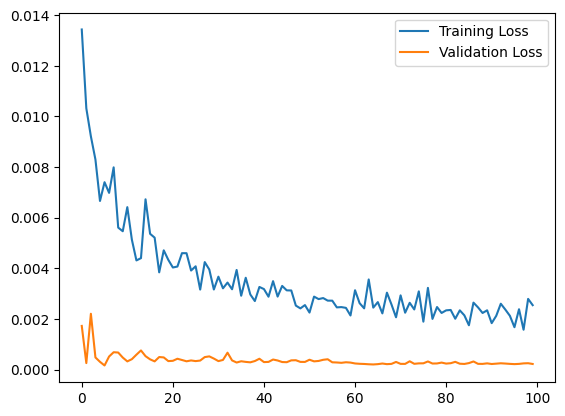

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9195e-04 
Train score: 0.0017441845266148448
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0623 
Test score: 0.0634273812174797


In [ ]:
# Build the GRU model
model = keras.Sequential()

# Add a GRU layer
model.add(layers.GRU(50, activation='tanh', recurrent_activation='sigmoid', input_shape=(X_train.shape[1], X_train.shape[2])))

# Add a dropout layer to prevent overfitting
model.add(layers.Dropout(rate=0.2))

# Add a dense layer for the output
model.add(layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.1, shuffle=False, verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, Y_train))
print("Test score:", model.evaluate(X_test, Y_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Test RMSE: 0.25184792192705147


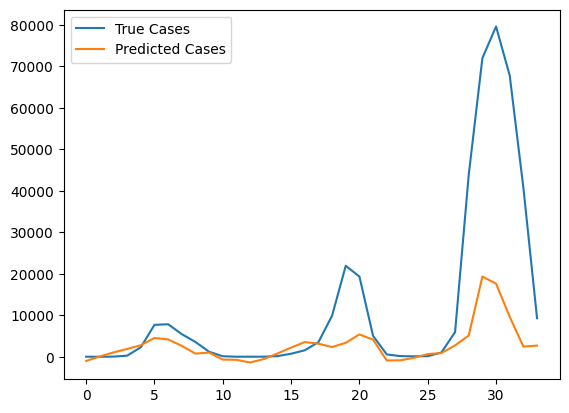

In [ ]:
# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate RMSE for test data
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Test RMSE:", rmse_test)

# Inverse transform the predictions and true values to their original scale
Y_pred = scaler.inverse_transform(np.concatenate([np.zeros((len(Y_pred), len(df.columns) - 1)), Y_pred], axis=1))[:, -1]
Y_test = scaler.inverse_transform(np.concatenate([np.zeros((len(Y_test), len(df.columns) - 1)), Y_test.reshape(-1, 1)], axis=1))[:, -1]

# Plot true vs predicted values
plt.plot(Y_test, label='True Cases')
plt.plot(Y_pred, label='Predicted Cases')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


<ipython-input-21-b42128923abe>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[-1, 0] = next_prediction  # Assuming the feature is the first column


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


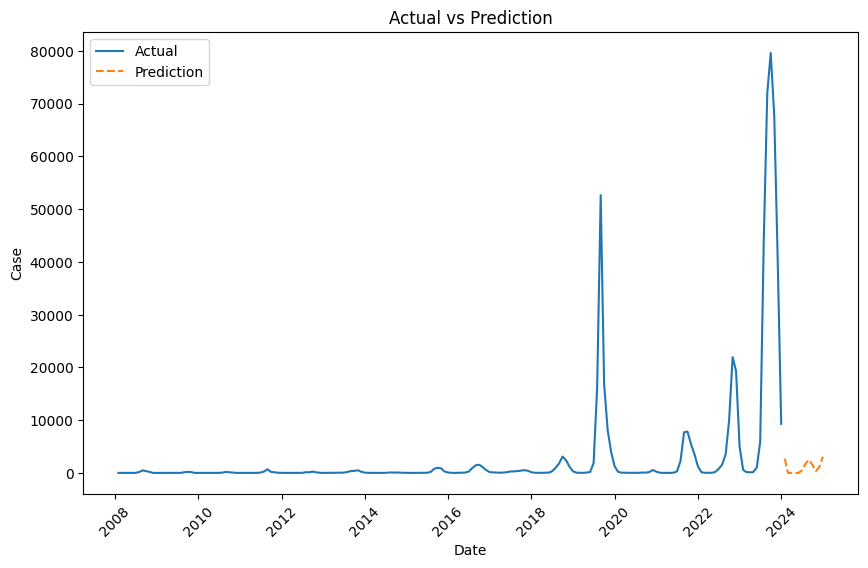

12-Month Predictions (as integers, min value 0):
2024-01: 2697
2024-02: 0
2024-03: 0
2024-04: 0
2024-05: 0
2024-06: 482
2024-07: 1726
2024-08: 2493
2024-09: 1530
2024-10: 353
2024-11: 1147
2024-12: 3059


In [ ]:
import numpy as np
import pandas as pd

# Number of months to predict
n_future = 12

# Get the last observed data point as the starting point for prediction
last_sequence = X_test[-1]

# Initialize an empty list to store predictions
future_predictions = []

# Generate predictions for the next 12 months
for i in range(n_future):
    # Reshape the last sequence to be compatible with the model input
    last_sequence_reshaped = last_sequence.reshape(1, last_sequence.shape[0], last_sequence.shape[1])

    # Predict the next value
    next_prediction = model.predict(last_sequence_reshaped)

    # Append the prediction to the future predictions list
    future_predictions.append(next_prediction[0, 0])

    # Update the last sequence with the new prediction (and drop the first value)
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1, 0] = next_prediction  # Assuming the feature is the first column

# Convert future predictions to a numpy array
future_predictions = np.array(future_predictions).reshape(-1, 1)

# Inverse transform the predictions to their original scale
future_predictions_original_scale = scaler.inverse_transform(
    np.concatenate([np.zeros((len(future_predictions), len(df.columns) - 1)), future_predictions], axis=1)
)[:, -1]

# Convert to integers and ensure minimum value is 0
future_predictions_original_scale = np.round(future_predictions_original_scale).astype(int)
future_predictions_original_scale = np.maximum(future_predictions_original_scale, 0)

# Convert predictions to a pandas DataFrame
future_dates = pd.date_range(start=df.index[-1], periods=n_future + 1, freq='M')[1:]
future_df = pd.DataFrame(future_predictions_original_scale, index=future_dates, columns=['Prediction'])

# Combine the original data with the predictions
df_with_predictions = pd.concat([df, future_df])

# Plot the original data and the predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['case'], label='Actual')
plt.plot(future_df.index, future_df['Prediction'], label='Prediction', linestyle='--')
plt.title('Actual vs Prediction')
plt.xlabel('Date')
plt.ylabel('Case')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Print the 12 predictions
print("12-Month Predictions (as integers, min value 0):")
for date, prediction in zip(future_dates, future_predictions_original_scale):
    print(f"{date.strftime('%Y-%m')}: {prediction}")

# GRU - Method 2 - THE BEST

## Try 1

Epoch 1/200


<ipython-input-7-d6d0e6e47153>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0380 - val_loss: 0.0208
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0189 - val_loss: 0.0194
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0148 - val_loss: 0.0213
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0176 - val_loss: 0.0222
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - val_loss: 0.0230
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0085 - val_loss: 0.0255
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0092 - val_loss: 0.0268
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0195 - val_loss: 0.0274
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0091 - val_loss: 0.0261
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0089 - val_loss: 0.0237
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0074 - val_loss: 0.0232
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0098 - val_loss: 0.0227


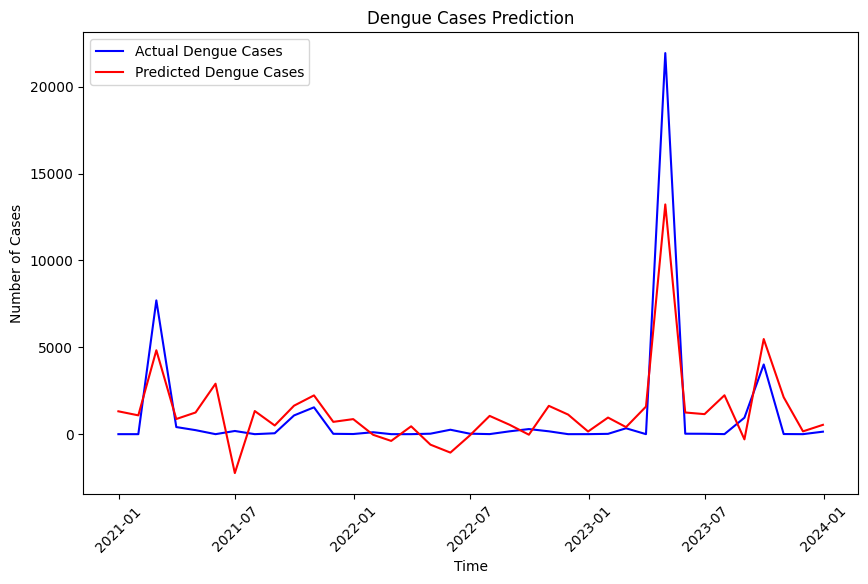

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/erdosinstitute/BD_combined_final.csv')

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Retain the date column separately for plotting
dates = data['date']

# Feature selection (excluding 'date')
features = ['temp_2m_mean', 'appar_temp_mean', 'rain_sum', 'goog_trends', 'case']
data = data[features]

# Handling missing values
data.fillna(method='ffill', inplace=True)

# Normalization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Look-back window
look_back = 7
X, y = [], []
for i in range(look_back, len(data_scaled)):
    X.append(data_scaled[i-look_back:i])
    y.append(data_scaled[i, -1])

X, y = np.array(X), np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model design
model = Sequential()
model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(units=32))
model.add(Dense(1))

# Compilation
model.compile(optimizer='adam', loss='mean_squared_error')

# Training
model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.1)

# Prediction
predictions = model.predict(X_test)

# Convert predictions and y_test back to original scale
y_test_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]
predictions_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], predictions), axis=1))[:, -1]

# Use the corresponding dates for the test set
test_dates = dates.iloc[-len(y_test_original):].reset_index(drop=True)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test_original, predictions_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, predictions_original)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score (Accuracy): {r2}")

# Plot predictions vs actual cases
plt.figure(figsize=(10, 6))
plt.plot(test_dates, y_test_original, color='blue', label='Actual Dengue Cases')
plt.plot(test_dates, predictions_original, color='red', label='Predicted Dengue Cases')
plt.title('Dengue Cases Prediction')
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set major ticks every 6 months
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


<ipython-input-8-04e78376fa4b>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[-1, -1] = next_prediction  # Assuming the target variable is the last column


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


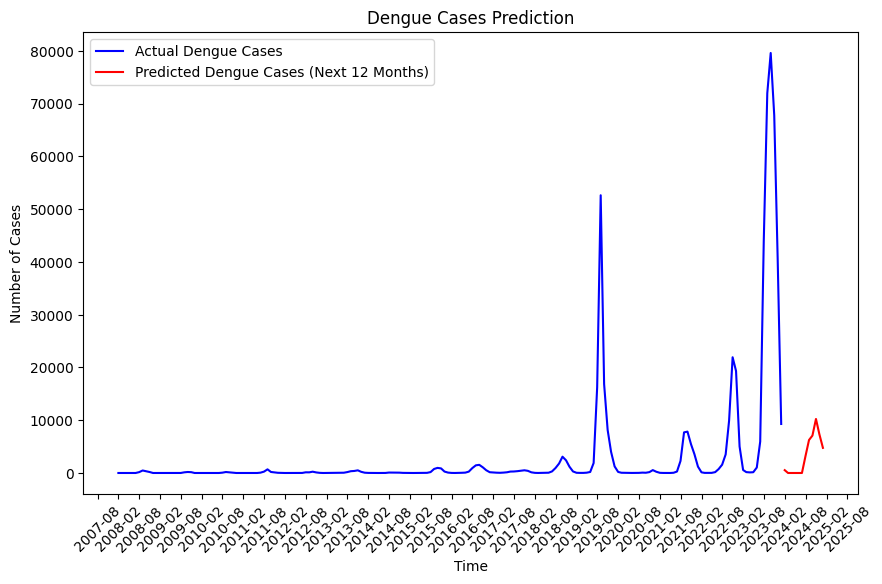

12-Month Predictions (as integers, min value 0):
2024-01: 536
2024-02: 0
2024-03: 0
2024-04: 0
2024-05: 0
2024-06: 0
2024-07: 3192
2024-08: 6250
2024-09: 7089
2024-10: 10239
2024-11: 7329
2024-12: 4762


In [ ]:
# Number of months to predict
n_future = 12

# Initialize the last sequence from the test set as the starting point for future predictions
last_sequence = X_test[-1]

# Initialize an empty list to store future predictions
future_predictions = []

# Generate predictions for the next 12 months
for i in range(n_future):
    # Reshape the last sequence to be compatible with the model input
    last_sequence_reshaped = last_sequence.reshape(1, last_sequence.shape[0], last_sequence.shape[1])

    # Predict the next value
    next_prediction = model.predict(last_sequence_reshaped)

    # Append the prediction to the future predictions list
    future_predictions.append(next_prediction[0, 0])

    # Update the last sequence by rolling it and adding the new prediction (drop the first value)
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1, -1] = next_prediction  # Assuming the target variable is the last column

# Convert future predictions to a numpy array and reshape it for inverse transformation
future_predictions = np.array(future_predictions).reshape(-1, 1)

# Inverse transform the predictions to their original scale
future_predictions_original_scale = scaler.inverse_transform(
    np.concatenate([np.zeros((len(future_predictions), X_test.shape[2] - 1)), future_predictions], axis=1)
)[:, -1]

# Convert to integers and ensure the minimum value is 0
future_predictions_original_scale = np.round(future_predictions_original_scale).astype(int)
future_predictions_original_scale = np.maximum(future_predictions_original_scale, 0)

# Generate future dates based on the last date in your dataset
last_date = dates.iloc[-1]
future_dates = pd.date_range(start=last_date, periods=n_future + 1, freq='M')[1:]

# Convert predictions to a pandas DataFrame
future_df = pd.DataFrame(future_predictions_original_scale, index=future_dates, columns=['Prediction'])

# Combine the original data with the predictions for plotting
df_with_predictions = pd.concat([data[['case']], future_df])

# Plot the original data and the future predictions
plt.figure(figsize=(10, 6))
plt.plot(dates, data['case'], color='blue', label='Actual Dengue Cases')
plt.plot(future_df.index, future_df['Prediction'], color='red', label='Predicted Dengue Cases (Next 12 Months)')
plt.title('Dengue Cases Prediction')
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set major ticks every 6 months
plt.legend()
plt.show()

# Print the 12-month predictions
print("12-Month Predictions (as integers, min value 0):")
for date, prediction in zip(future_dates, future_predictions_original_scale):
    print(f"{date.strftime('%Y-%m')}: {prediction}")

## Try 2

Epoch 1/200


<ipython-input-11-d6d0e6e47153>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0299 - val_loss: 0.0242
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0137 - val_loss: 0.0190
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0183 - val_loss: 0.0185
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0275 - val_loss: 0.0206
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0188 - val_loss: 0.0209
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0169 - val_loss: 0.0217
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0190 - val_loss: 0.0230
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0089 - val_loss: 0.0214
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0106 - val_loss: 0.0213
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0084 - val_loss: 0.0213
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0134 - val_loss: 0.0210
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - val_loss: 0.0184
E

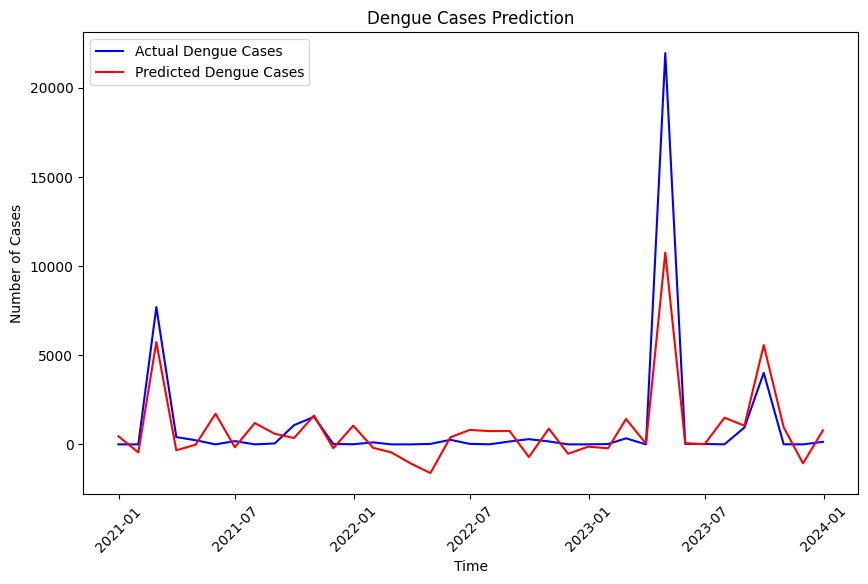

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/erdosinstitute/BD_combined_final.csv')

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Retain the date column separately for plotting
dates = data['date']

# Feature selection (excluding 'date')
features = ['temp_2m_mean', 'appar_temp_mean', 'rain_sum', 'goog_trends', 'case']
data = data[features]

# Handling missing values
data.fillna(method='ffill', inplace=True)

# Normalization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Look-back window
look_back = 7
X, y = [], []
for i in range(look_back, len(data_scaled)):
    X.append(data_scaled[i-look_back:i])
    y.append(data_scaled[i, -1])

X, y = np.array(X), np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model design
model = Sequential()
model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(units=32))
model.add(Dense(1))

# Compilation
model.compile(optimizer='adam', loss='mean_squared_error')

# Training
model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.1)

# Prediction
predictions = model.predict(X_test)

# Convert predictions and y_test back to original scale
y_test_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]
predictions_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], predictions), axis=1))[:, -1]

# Use the corresponding dates for the test set
test_dates = dates.iloc[-len(y_test_original):].reset_index(drop=True)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test_original, predictions_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, predictions_original)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score (Accuracy): {r2}")

# Plot predictions vs actual cases
plt.figure(figsize=(10, 6))
plt.plot(test_dates, y_test_original, color='blue', label='Actual Dengue Cases')
plt.plot(test_dates, predictions_original, color='red', label='Predicted Dengue Cases')
plt.title('Dengue Cases Prediction')
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set major ticks every 6 months
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


<ipython-input-12-cc0f526dfe38>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[-1, -1] = next_prediction  # Assuming the target variable is the last column


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


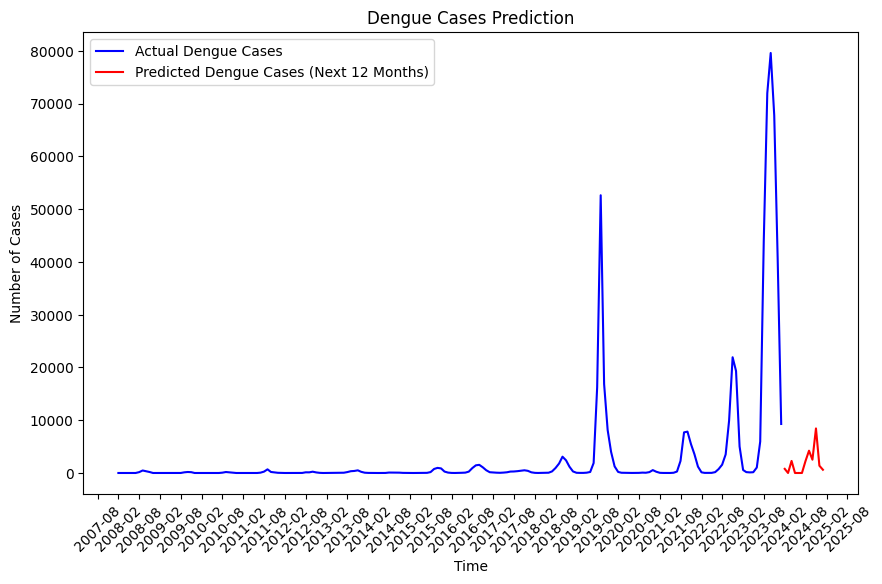

12-Month Predictions (as integers, min value 0):
2024-01: 783
2024-02: 0
2024-03: 2285
2024-04: 0
2024-05: 0
2024-06: 0
2024-07: 2250
2024-08: 4226
2024-09: 2519
2024-10: 8444
2024-11: 1379
2024-12: 613


In [ ]:
# Number of months to predict
n_future = 12

# Initialize the last sequence from the test set as the starting point for future predictions
last_sequence = X_test[-1]

# Initialize an empty list to store future predictions
future_predictions = []

# Generate predictions for the next 12 months
for i in range(n_future):
    # Reshape the last sequence to be compatible with the model input
    last_sequence_reshaped = last_sequence.reshape(1, last_sequence.shape[0], last_sequence.shape[1])

    # Predict the next value
    next_prediction = model.predict(last_sequence_reshaped)

    # Append the prediction to the future predictions list
    future_predictions.append(next_prediction[0, 0])

    # Update the last sequence by rolling it and adding the new prediction (drop the first value)
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1, -1] = next_prediction  # Assuming the target variable is the last column

# Convert future predictions to a numpy array and reshape it for inverse transformation
future_predictions = np.array(future_predictions).reshape(-1, 1)

# Inverse transform the predictions to their original scale
future_predictions_original_scale = scaler.inverse_transform(
    np.concatenate([np.zeros((len(future_predictions), X_test.shape[2] - 1)), future_predictions], axis=1)
)[:, -1]

# Convert to integers and ensure the minimum value is 0
future_predictions_original_scale = np.round(future_predictions_original_scale).astype(int)
future_predictions_original_scale = np.maximum(future_predictions_original_scale, 0)

# Generate future dates based on the last date in your dataset
last_date = dates.iloc[-1]
future_dates = pd.date_range(start=last_date, periods=n_future + 1, freq='M')[1:]

# Convert predictions to a pandas DataFrame
future_df = pd.DataFrame(future_predictions_original_scale, index=future_dates, columns=['Prediction'])

# Combine the original data with the predictions for plotting
df_with_predictions = pd.concat([data[['case']], future_df])

# Plot the original data and the future predictions
plt.figure(figsize=(10, 6))
plt.plot(dates, data['case'], color='blue', label='Actual Dengue Cases')
plt.plot(future_df.index, future_df['Prediction'], color='red', label='Predicted Dengue Cases (Next 12 Months)')
plt.title('Dengue Cases Prediction')
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set major ticks every 6 months
plt.legend()
plt.show()

# Print the 12-month predictions
print("12-Month Predictions (as integers, min value 0):")
for date, prediction in zip(future_dates, future_predictions_original_scale):
    print(f"{date.strftime('%Y-%m')}: {prediction}")

## Try 3

<ipython-input-13-d6d0e6e47153>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0334 - val_loss: 0.0216
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0244 - val_loss: 0.0215
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0190 - val_loss: 0.0247
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0099 - val_loss: 0.0288
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0157 - val_loss: 0.0287
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0143 - val_loss: 0.0256
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0081 - val_loss: 0.0240
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0069 - val_loss: 0.0235
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0075 - val_loss: 0.0246
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0156 - val_loss: 0.0248
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0057 - val_loss: 0.0244
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0083 - val_l

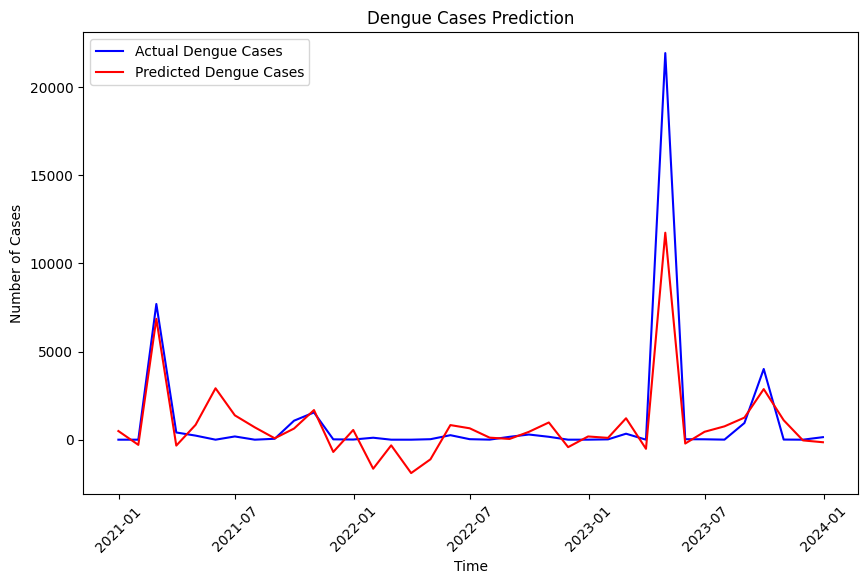

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/erdosinstitute/BD_combined_final.csv')

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Retain the date column separately for plotting
dates = data['date']

# Feature selection (excluding 'date')
features = ['temp_2m_mean', 'appar_temp_mean', 'rain_sum', 'goog_trends', 'case']
data = data[features]

# Handling missing values
data.fillna(method='ffill', inplace=True)

# Normalization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Look-back window
look_back = 7
X, y = [], []
for i in range(look_back, len(data_scaled)):
    X.append(data_scaled[i-look_back:i])
    y.append(data_scaled[i, -1])

X, y = np.array(X), np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model design
model = Sequential()
model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(units=32))
model.add(Dense(1))

# Compilation
model.compile(optimizer='adam', loss='mean_squared_error')

# Training
model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.1)

# Prediction
predictions = model.predict(X_test)

# Convert predictions and y_test back to original scale
y_test_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]
predictions_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], predictions), axis=1))[:, -1]

# Use the corresponding dates for the test set
test_dates = dates.iloc[-len(y_test_original):].reset_index(drop=True)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test_original, predictions_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, predictions_original)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score (Accuracy): {r2}")

# Plot predictions vs actual cases
plt.figure(figsize=(10, 6))
plt.plot(test_dates, y_test_original, color='blue', label='Actual Dengue Cases')
plt.plot(test_dates, predictions_original, color='red', label='Predicted Dengue Cases')
plt.title('Dengue Cases Prediction')
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set major ticks every 6 months
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<ipython-input-14-cc0f526dfe38>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[-1, -1] = next_prediction  # Assuming the target variable is the last column


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


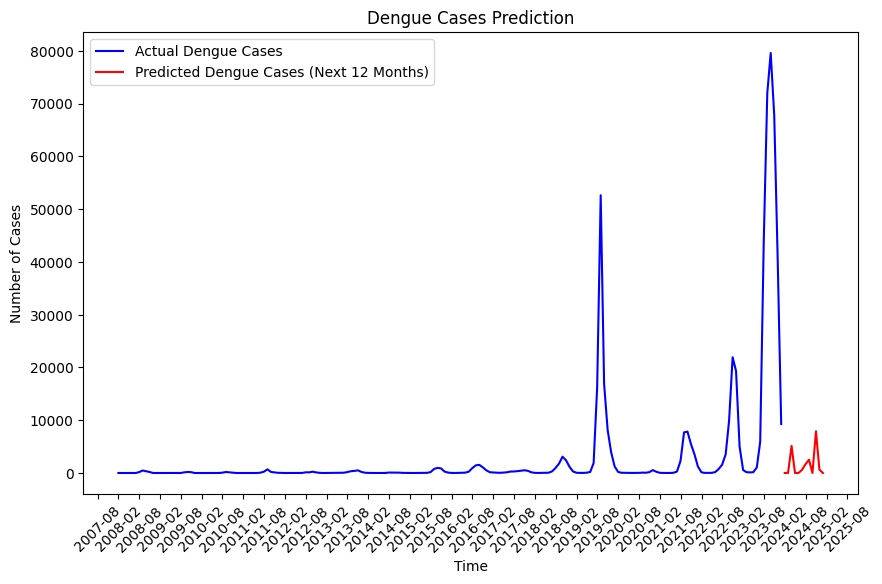

12-Month Predictions (as integers, min value 0):
2024-01: 0
2024-02: 0
2024-03: 5136
2024-04: 0
2024-05: 0
2024-06: 583
2024-07: 1665
2024-08: 2512
2024-09: 0
2024-10: 7907
2024-11: 652
2024-12: 0


In [ ]:
# Number of months to predict
n_future = 12

# Initialize the last sequence from the test set as the starting point for future predictions
last_sequence = X_test[-1]

# Initialize an empty list to store future predictions
future_predictions = []

# Generate predictions for the next 12 months
for i in range(n_future):
    # Reshape the last sequence to be compatible with the model input
    last_sequence_reshaped = last_sequence.reshape(1, last_sequence.shape[0], last_sequence.shape[1])

    # Predict the next value
    next_prediction = model.predict(last_sequence_reshaped)

    # Append the prediction to the future predictions list
    future_predictions.append(next_prediction[0, 0])

    # Update the last sequence by rolling it and adding the new prediction (drop the first value)
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1, -1] = next_prediction  # Assuming the target variable is the last column

# Convert future predictions to a numpy array and reshape it for inverse transformation
future_predictions = np.array(future_predictions).reshape(-1, 1)

# Inverse transform the predictions to their original scale
future_predictions_original_scale = scaler.inverse_transform(
    np.concatenate([np.zeros((len(future_predictions), X_test.shape[2] - 1)), future_predictions], axis=1)
)[:, -1]

# Convert to integers and ensure the minimum value is 0
future_predictions_original_scale = np.round(future_predictions_original_scale).astype(int)
future_predictions_original_scale = np.maximum(future_predictions_original_scale, 0)

# Generate future dates based on the last date in your dataset
last_date = dates.iloc[-1]
future_dates = pd.date_range(start=last_date, periods=n_future + 1, freq='M')[1:]

# Convert predictions to a pandas DataFrame
future_df = pd.DataFrame(future_predictions_original_scale, index=future_dates, columns=['Prediction'])

# Combine the original data with the predictions for plotting
df_with_predictions = pd.concat([data[['case']], future_df])

# Plot the original data and the future predictions
plt.figure(figsize=(10, 6))
plt.plot(dates, data['case'], color='blue', label='Actual Dengue Cases')
plt.plot(future_df.index, future_df['Prediction'], color='red', label='Predicted Dengue Cases (Next 12 Months)')
plt.title('Dengue Cases Prediction')
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set major ticks every 6 months
plt.legend()
plt.show()

# Print the 12-month predictions
print("12-Month Predictions (as integers, min value 0):")
for date, prediction in zip(future_dates, future_predictions_original_scale):
    print(f"{date.strftime('%Y-%m')}: {prediction}")

## Try 4

<ipython-input-15-d6d0e6e47153>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0369 - val_loss: 0.0186
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0164 - val_loss: 0.0185
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0111 - val_loss: 0.0202
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0131 - val_loss: 0.0216
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0124 - val_loss: 0.0244
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0106 - val_loss: 0.0256
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - val_loss: 0.0271
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0110 - val_loss: 0.0275
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0190 - val_loss: 0.0249
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0145 - val_loss: 0.0247
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0134 - val_loss: 0.0245
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0079 - val_lo

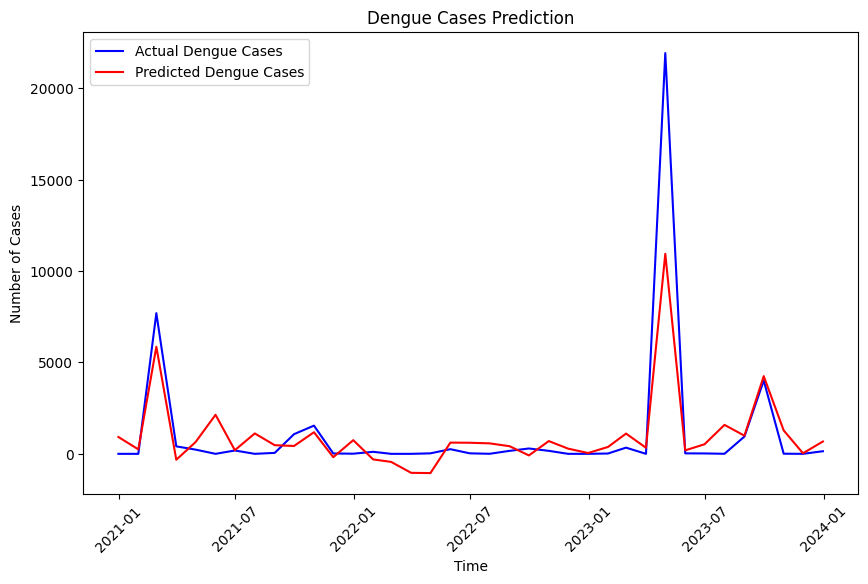

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/erdosinstitute/BD_combined_final.csv')

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Retain the date column separately for plotting
dates = data['date']

# Feature selection (excluding 'date')
features = ['temp_2m_mean', 'appar_temp_mean', 'rain_sum', 'goog_trends', 'case']
data = data[features]

# Handling missing values
data.fillna(method='ffill', inplace=True)

# Normalization
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Look-back window
look_back = 7
X, y = [], []
for i in range(look_back, len(data_scaled)):
    X.append(data_scaled[i-look_back:i])
    y.append(data_scaled[i, -1])

X, y = np.array(X), np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model design
model = Sequential()
model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(units=32))
model.add(Dense(1))

# Compilation
model.compile(optimizer='adam', loss='mean_squared_error')

# Training
model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.1)

# Prediction
predictions = model.predict(X_test)

# Convert predictions and y_test back to original scale
y_test_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]
predictions_original = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], predictions), axis=1))[:, -1]

# Use the corresponding dates for the test set
test_dates = dates.iloc[-len(y_test_original):].reset_index(drop=True)

# Calculate MSE and R2 score
mse = mean_squared_error(y_test_original, predictions_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, predictions_original)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score (Accuracy): {r2}")

# Plot predictions vs actual cases
plt.figure(figsize=(10, 6))
plt.plot(test_dates, y_test_original, color='blue', label='Actual Dengue Cases')
plt.plot(test_dates, predictions_original, color='red', label='Predicted Dengue Cases')
plt.title('Dengue Cases Prediction')
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set major ticks every 6 months
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


<ipython-input-16-cc0f526dfe38>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[-1, -1] = next_prediction  # Assuming the target variable is the last column


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


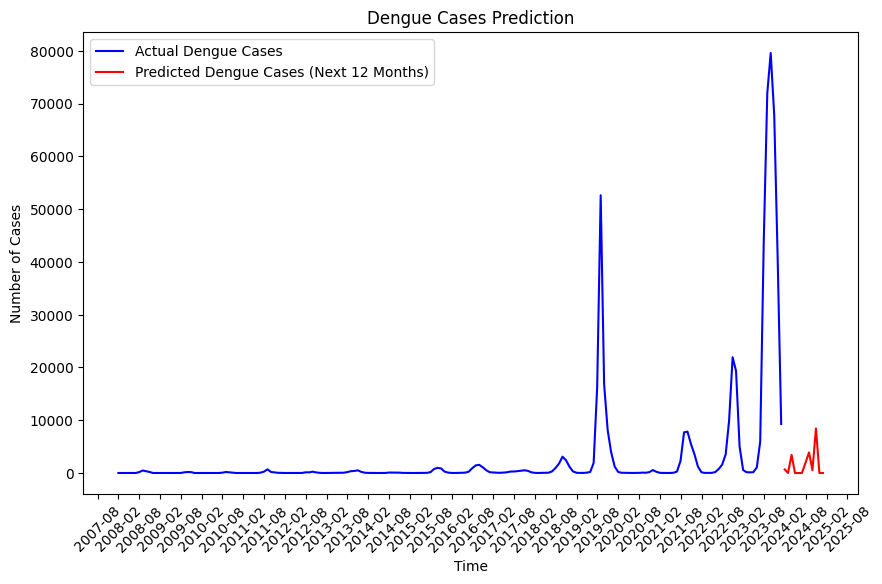

12-Month Predictions (as integers, min value 0):
2024-01: 676
2024-02: 0
2024-03: 3441
2024-04: 0
2024-05: 0
2024-06: 0
2024-07: 1914
2024-08: 3896
2024-09: 540
2024-10: 8446
2024-11: 0
2024-12: 0


In [ ]:
# Number of months to predict
n_future = 12

# Initialize the last sequence from the test set as the starting point for future predictions
last_sequence = X_test[-1]

# Initialize an empty list to store future predictions
future_predictions = []

# Generate predictions for the next 12 months
for i in range(n_future):
    # Reshape the last sequence to be compatible with the model input
    last_sequence_reshaped = last_sequence.reshape(1, last_sequence.shape[0], last_sequence.shape[1])

    # Predict the next value
    next_prediction = model.predict(last_sequence_reshaped)

    # Append the prediction to the future predictions list
    future_predictions.append(next_prediction[0, 0])

    # Update the last sequence by rolling it and adding the new prediction (drop the first value)
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1, -1] = next_prediction  # Assuming the target variable is the last column

# Convert future predictions to a numpy array and reshape it for inverse transformation
future_predictions = np.array(future_predictions).reshape(-1, 1)

# Inverse transform the predictions to their original scale
future_predictions_original_scale = scaler.inverse_transform(
    np.concatenate([np.zeros((len(future_predictions), X_test.shape[2] - 1)), future_predictions], axis=1)
)[:, -1]

# Convert to integers and ensure the minimum value is 0
future_predictions_original_scale = np.round(future_predictions_original_scale).astype(int)
future_predictions_original_scale = np.maximum(future_predictions_original_scale, 0)

# Generate future dates based on the last date in your dataset
last_date = dates.iloc[-1]
future_dates = pd.date_range(start=last_date, periods=n_future + 1, freq='M')[1:]

# Convert predictions to a pandas DataFrame
future_df = pd.DataFrame(future_predictions_original_scale, index=future_dates, columns=['Prediction'])

# Combine the original data with the predictions for plotting
df_with_predictions = pd.concat([data[['case']], future_df])

# Plot the original data and the future predictions
plt.figure(figsize=(10, 6))
plt.plot(dates, data['case'], color='blue', label='Actual Dengue Cases')
plt.plot(future_df.index, future_df['Prediction'], color='red', label='Predicted Dengue Cases (Next 12 Months)')
plt.title('Dengue Cases Prediction')
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Set major ticks every 6 months
plt.legend()
plt.show()

# Print the 12-month predictions
print("12-Month Predictions (as integers, min value 0):")
for date, prediction in zip(future_dates, future_predictions_original_scale):
    print(f"{date.strftime('%Y-%m')}: {prediction}")

# GRU - Method 3

<ipython-input-4-4d5e43f92377>:15: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'], dayfirst=True)
<ipython-input-4-4d5e43f92377>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 139ms/step - loss: 0.0068 - val_loss: 0.0802
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0077 - val_loss: 0.0990
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0073 - val_loss: 0.0746
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0026 - val_loss: 0.0772
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0055 - val_loss: 0.0764
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0017 - val_loss: 0.0685
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0027 - val_loss: 0.0720
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0047 - val_loss: 0.0700
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0074 - val_loss: 0.0719
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0027 - val_loss: 0.0635
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0026 - val_loss: 0.0700
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0028 - val_

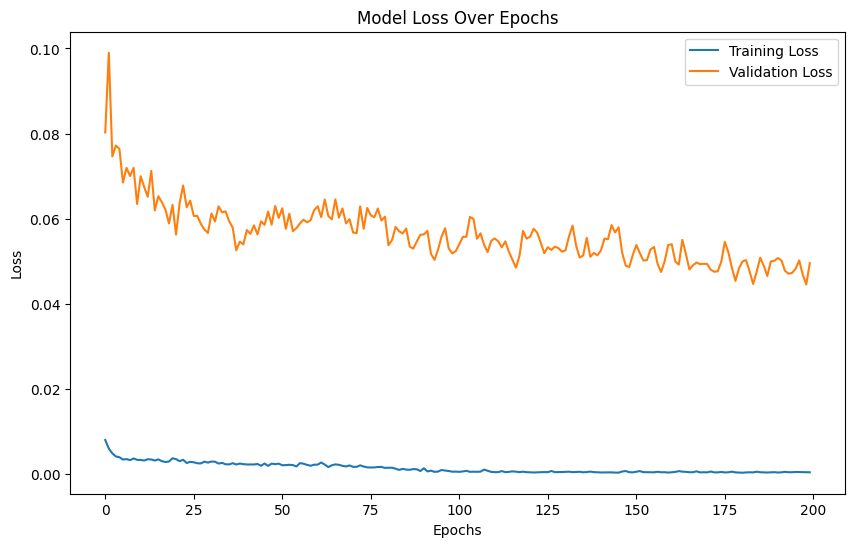

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset and parse dates
data_path = '/content/drive/MyDrive/erdosinstitute/BD_combined_final.csv'
data = pd.read_csv(data_path)

# Ensure the 'date' column is parsed as datetime
data['date'] = pd.to_datetime(data['date'], dayfirst=True)

# Handle missing values by forward-filling
data.fillna(method='ffill', inplace=True)

# Select features including 'date'
features = ['date', 'temp_2m_mean', 'appar_temp_mean', 'rain_sum', 'goog_trends', 'case']
data = data[features]

# Extract 'date' for plotting purposes
dates = data['date']

# Normalize the other features (excluding 'date')
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['date']))

# Prepare the input data for prediction
look_back = 24
X_all, y_all = [], []
for i in range(look_back, len(data_scaled)):
    X_all.append(data_scaled[i-look_back:i])
    y_all.append(data_scaled[i, -1])

X_all, y_all = np.array(X_all), np.array(y_all)

# Split data into training and testing sets (80% training)
train_size = int(len(X_all) * 0.8)
X_train, X_test = X_all[:train_size], X_all[train_size:]
y_train, y_test = y_all[:train_size], y_all[train_size:]

# Train the model on the training dataset
model = Sequential()
model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(units=32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and capture history
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test))

# Predict the cases for the training and testing sets
train_predictions = model.predict(X_train).flatten()
test_predictions = model.predict(X_test).flatten()

# Convert the predictions and true values back to the original scale
dummy_features_train = np.zeros((train_predictions.shape[0], X_train.shape[2] - 1))
full_predictions_train = np.concatenate((dummy_features_train, train_predictions.reshape(-1, 1)), axis=1)
train_predictions_original_scale = scaler.inverse_transform(full_predictions_train)[:, -1]

dummy_features_test = np.zeros((test_predictions.shape[0], X_test.shape[2] - 1))
full_predictions_test = np.concatenate((dummy_features_test, test_predictions.reshape(-1, 1)), axis=1)
test_predictions_original_scale = scaler.inverse_transform(full_predictions_test)[:, -1]

# Inverse transform y_train and y_test to their original scale
y_train_original_scale = scaler.inverse_transform(np.concatenate([np.zeros((y_train.shape[0], X_train.shape[2] - 1)), y_train.reshape(-1, 1)], axis=1))[:, -1]
y_test_original_scale = scaler.inverse_transform(np.concatenate([np.zeros((y_test.shape[0], X_test.shape[2] - 1)), y_test.reshape(-1, 1)], axis=1))[:, -1]

# Calculate the accuracy metrics: MSE, RMSE, and R² for training and testing data on the original scale
mse_train_original = mean_squared_error(y_train_original_scale, train_predictions_original_scale)
mse_test_original = mean_squared_error(y_test_original_scale, test_predictions_original_scale)
rmse_train_original = np.sqrt(mse_train_original)
rmse_test_original = np.sqrt(mse_test_original)
r2_train_original = r2_score(y_train_original_scale, train_predictions_original_scale)
r2_test_original = r2_score(y_test_original_scale, test_predictions_original_scale)

print(f"Training MSE (Original Scale): {mse_train_original:.4f}, Training RMSE (Original Scale): {rmse_train_original:.4f}, Training R² (Original Scale): {r2_train_original:.4f}")
print(f"Testing MSE (Original Scale): {mse_test_original:.4f}, Testing RMSE (Original Scale): {rmse_test_original:.4f}, Testing R² (Original Scale): {r2_test_original:.4f}")

# Plotting the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

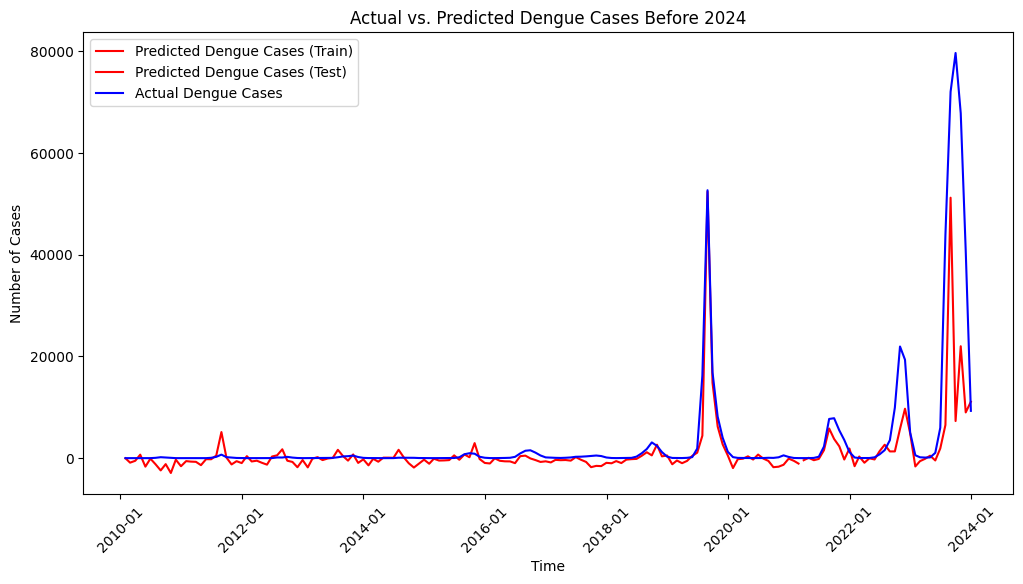

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [ ]:
# Plot actual vs. predicted cases before 2024
aligned_length = min(len(X_train) + len(X_test), len(train_predictions_original_scale) + len(test_predictions_original_scale))
aligned_dates = dates[look_back:look_back + aligned_length]

plt.figure(figsize=(12, 6))
plt.plot(aligned_dates[:len(train_predictions_original_scale)], train_predictions_original_scale, color='red', label='Predicted Dengue Cases (Train)')
plt.plot(aligned_dates[len(train_predictions_original_scale):], test_predictions_original_scale, color='red', label='Predicted Dengue Cases (Test)')
plt.plot(aligned_dates, data['case'][look_back:look_back + aligned_length], color='blue', label='Actual Dengue Cases')
plt.title('Actual vs. Predicted Dengue Cases Before 2024')
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.legend()
plt.show()

# Predict the cases for the entire 2024 (January to December)
predictions_2024 = []
input_seq = X_all[-1]  # Start with the last sequence from 2023

for _ in range(12):  # Predict 12 future steps (Jan to Dec 2024)
    pred = model.predict(input_seq.reshape(1, look_back, -1))
    predictions_2024.append(pred[0, 0])

    # Update the input sequence
    new_input = np.roll(input_seq, -1, axis=0)
    new_input[-1, -1] = pred[0, 0]  # Update the last case with the predicted value
    input_seq = new_input

# Convert predictions back to the original scale
predictions_scaled_2024 = np.array(predictions_2024).reshape(-1, 1)
# Create a full feature set for inverse scaling with same columns as original except for the case values
dummy_features_2024 = np.zeros((predictions_scaled_2024.shape[0], X_all.shape[2] - 1))
full_predictions_2024 = np.concatenate((dummy_features_2024, predictions_scaled_2024), axis=1)
predictions_original_scale_2024 = scaler.inverse_transform(full_predictions_2024)[:, -1]

# Clip predictions to ensure there are no negative values
predictions_original_scale_2024 = np.clip(predictions_original_scale_2024, 0, None)

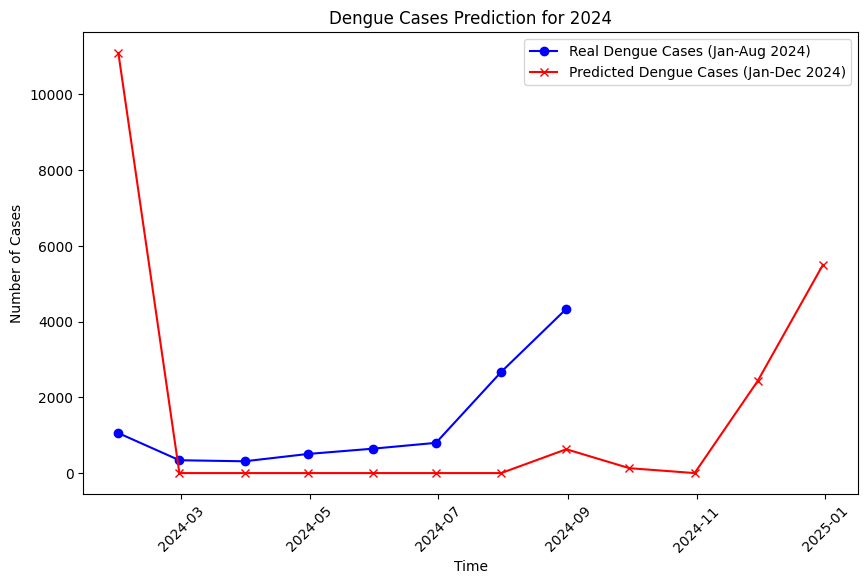

Full Year 2024 Dengue Cases (Real + Predicted):
2024-01: Real = 1055, Predicted = 11087.0
2024-02: Real = 339, Predicted = 0.0
2024-03: Real = 311, Predicted = 0.0
2024-04: Real = 504, Predicted = 0.0
2024-05: Real = 644, Predicted = 0.0
2024-06: Real = 798, Predicted = 0.0
2024-07: Real = 2669, Predicted = 0.0
2024-08: Real = 4336, Predicted = 629.0
2024-09: Predicted = 129.0
2024-10: Predicted = 0.0
2024-11: Predicted = 2432.0
2024-12: Predicted = 5498.0


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Generate dates for the full year of 2024
dates_2024 = pd.date_range(start='2024-01', periods=12, freq='M')

# Combine real data and predictions for 2024
real_cases_2024 = [1055, 339, 311, 504, 644, 798, 2669, 4336]
full_year_2024_prediction = np.round(predictions_original_scale_2024.tolist(),0)
full_year_2024_to_aug_real = real_cases_2024

# Plot the full year 2024 cases
plt.figure(figsize=(10, 6))

# Plot real cases for Jan-Aug 2024
plt.plot(dates_2024[:8], full_year_2024_to_aug_real, color='blue', label='Real Dengue Cases (Jan-Aug 2024)', marker='o')

# Plot predicted cases for Jan-Dec 2024
plt.plot(dates_2024, full_year_2024_prediction, color='red', label='Predicted Dengue Cases (Jan-Dec 2024)', marker='x')

# Set titles and labels
plt.title('Dengue Cases Prediction for 2024')
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Display legend
plt.legend()

# Show plot
plt.show()

# Print out the full 2024 cases (real + predicted)
print("Full Year 2024 Dengue Cases (Real + Predicted):")
for date, real, pred in zip(dates_2024[:8], real_cases_2024, full_year_2024_prediction[:8]):
    print(f"{date.strftime('%Y-%m')}: Real = {real}, Predicted = {pred}")

for date, pred in zip(dates_2024[8:], full_year_2024_prediction[8:]):
    print(f"{date.strftime('%Y-%m')}: Predicted = {pred}")

# GRU - GridSearchCV

In [ ]:
!pip install keras

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.3 MB/s eta 0:00:00


<ipython-input-3-1d60c3335d2e>:17: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'], dayfirst=True)
<ipython-input-3-1d60c3335d2e>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training with units=32, dropout_rate=0.1, learn_rate=0.001, batch_size=16, epochs=50
Validation Loss: 0.00709680886939168
Training with units=32, dropout_rate=0.1, learn_rate=0.001, batch_size=16, epochs=100
Validation Loss: 0.004716638009995222
Training with units=32, dropout_rate=0.1, learn_rate=0.001, batch_size=32, epochs=50
Validation Loss: 0.0055727893486619
Training with units=32, dropout_rate=0.1, learn_rate=0.001, batch_size=32, epochs=100
Validation Loss: 0.005080990958958864
Training with units=32, dropout_rate=0.1, learn_rate=0.01, batch_size=16, epochs=50


Validation Loss: 0.003602375276386738
Training with units=32, dropout_rate=0.1, learn_rate=0.01, batch_size=16, epochs=100


Validation Loss: 0.003399315755814314
Training with units=32, dropout_rate=0.1, learn_rate=0.01, batch_size=32, epochs=50
Validation Loss: 0.0027691107243299484
Training with units=32, dropout_rate=0.1, learn_rate=0.01, batch_size=32, epochs=100
Validation Loss: 0.005396603606641293
Training with units=32, dropout_rate=0.2, learn_rate=0.001, batch_size=16, epochs=50
Validation Loss: 0.004884486552327871
Training with units=32, dropout_rate=0.2, learn_rate=0.001, batch_size=16, epochs=100
Validation Loss: 0.005304309539496899
Training with units=32, dropout_rate=0.2, learn_rate=0.001, batch_size=32, epochs=50
Validation Loss: 0.010022437199950218
Training with units=32, dropout_rate=0.2, learn_rate=0.001, batch_size=32, epochs=100
Validation Loss: 0.00519067607820034
Training with units=32, dropout_rate=0.2, learn_rate=0.01, batch_size=16, epochs=50
Validation Loss: 0.015194124542176723
Training with units=32, dropout_rate=0.2, learn_rate=0.01, batch_size=16, epochs=100
Validation Loss:

<ipython-input-3-1d60c3335d2e>:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[-1, -1] = next_prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


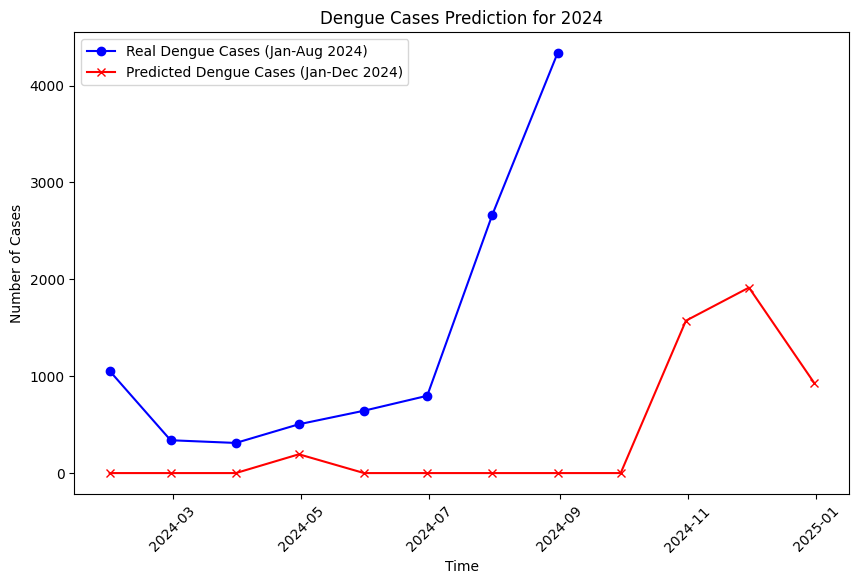

Full Year 2024 Dengue Cases (Real + Predicted):
2024-01: Real = 1055, Predicted = 0
2024-02: Real = 339, Predicted = 0
2024-03: Real = 311, Predicted = 0
2024-04: Real = 504, Predicted = 194
2024-05: Real = 644, Predicted = 0
2024-06: Real = 798, Predicted = 0
2024-07: Real = 2669, Predicted = 0
2024-08: Real = 4336, Predicted = 0
2024-09: Predicted = 0
2024-10: Predicted = 1573
2024-11: Predicted = 1915
2024-12: Predicted = 931


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset and parse dates
data_path = '/content/drive/MyDrive/erdosinstitute/BD_combined_final.csv'
data = pd.read_csv(data_path)

# Ensure the 'date' column is parsed as datetime
data['date'] = pd.to_datetime(data['date'], dayfirst=True)

# Handle missing values by forward-filling
data.fillna(method='ffill', inplace=True)

# Select features including 'date'
features = ['date', 'temp_2m_mean', 'appar_temp_mean', 'rain_sum', 'goog_trends', 'case']
data = data[features]

# Extract 'date' for plotting purposes
dates = data['date']

# Normalize the other features (excluding 'date')
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['date']))

# Prepare the input data for prediction
look_back = 24
X_all, y_all = [], []
for i in range(look_back, len(data_scaled)):
    X_all.append(data_scaled[i-look_back:i])
    y_all.append(data_scaled[i, -1])

X_all, y_all = np.array(X_all), np.array(y_all)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Function to create the Keras model
def create_model(units=64, dropout_rate=0.2, learn_rate=0.001):
    model = Sequential()
    model.add(GRU(units=units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(GRU(units=units//2))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learn_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Manually implement grid search
def manual_grid_search(X_train, y_train, X_val, y_val):
    param_grid = {
        'units': [32, 64, 128],
        'dropout_rate': [0.1, 0.2, 0.3],
        'learn_rate': [0.001, 0.01],
        'batch_size': [16, 32],
        'epochs': [50, 100]
    }

    best_score = float('inf')
    best_params = None
    best_model = None

    for units in param_grid['units']:
        for dropout_rate in param_grid['dropout_rate']:
            for learn_rate in param_grid['learn_rate']:
                for batch_size in param_grid['batch_size']:
                    for epochs in param_grid['epochs']:
                        print(f"Training with units={units}, dropout_rate={dropout_rate}, learn_rate={learn_rate}, batch_size={batch_size}, epochs={epochs}")

                        model = create_model(units=units, dropout_rate=dropout_rate, learn_rate=learn_rate)
                        model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)

                        val_loss = model.evaluate(X_val, y_val, verbose=0)

                        if val_loss < best_score:
                            best_score = val_loss
                            best_params = {
                                'units': units,
                                'dropout_rate': dropout_rate,
                                'learn_rate': learn_rate,
                                'batch_size': batch_size,
                                'epochs': epochs
                            }
                            best_model = model
                        print(f"Validation Loss: {val_loss}")

    print(f"Best parameters: {best_params}")
    print(f"Best validation loss: {best_score}")

    return best_model, best_params

# Split the training set further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Perform the manual grid search
best_model, best_params = manual_grid_search(X_train, y_train, X_val, y_val)

# Predict the cases for the training and testing sets
train_predictions = best_model.predict(X_train).flatten()
test_predictions = best_model.predict(X_test).flatten()

# Convert the predictions back to the original scale
dummy_features_train = np.zeros((train_predictions.shape[0], X_train.shape[2] - 1))
full_predictions_train = np.concatenate((dummy_features_train, train_predictions.reshape(-1, 1)), axis=1)
train_predictions_original_scale = scaler.inverse_transform(full_predictions_train)[:, -1]

dummy_features_test = np.zeros((test_predictions.shape[0], X_test.shape[2] - 1))
full_predictions_test = np.concatenate((dummy_features_test, test_predictions.reshape(-1, 1)), axis=1)
test_predictions_original_scale = scaler.inverse_transform(full_predictions_test)[:, -1]

# Calculate the accuracy metrics: MSE, RMSE, and R² for training and testing data
mse_train = mean_squared_error(y_train, train_predictions)
mse_test = mean_squared_error(y_test, test_predictions)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

print(f"Training MSE: {mse_train:.4f}, Training RMSE: {rmse_train:.4f}, Training R²: {r2_train:.4f}")
print(f"Testing MSE: {mse_test:.4f}, Testing RMSE: {rmse_test:.4f}, Testing R²: {r2_test:.4f}")

# Predict the future cases for 2024
n_future = 12
last_sequence = X_test[-1]
future_predictions = []

for i in range(n_future):
    last_sequence_reshaped = last_sequence.reshape(1, last_sequence.shape[0], last_sequence.shape[1])
    next_prediction = best_model.predict(last_sequence_reshaped)
    future_predictions.append(next_prediction[0])
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1, -1] = next_prediction

future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions_original_scale = scaler.inverse_transform(
    np.concatenate([np.zeros((len(future_predictions), X_test.shape[2] - 1)), future_predictions], axis=1)
)[:, -1]

future_predictions_original_scale = np.round(future_predictions_original_scale).astype(int)
future_predictions_original_scale = np.maximum(future_predictions_original_scale, 0)

# Generate dates for the full year of 2024
dates_2024 = pd.date_range(start='2024-01', periods=12, freq='M')

# Real data for Jan-Aug 2024
real_cases_2024 = [1055, 339, 311, 504, 644, 798, 2669, 4336]

# Plot the full year 2024 cases
plt.figure(figsize=(10, 6))
plt.plot(dates_2024[:8], real_cases_2024, color='blue', label='Real Dengue Cases (Jan-Aug 2024)', marker='o')
plt.plot(dates_2024, future_predictions_original_scale, color='red', label='Predicted Dengue Cases (Jan-Dec 2024)', marker='x')
plt.title('Dengue Cases Prediction for 2024')
plt.xlabel('Time')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.legend()
plt.show()

# Print out the full 2024 cases (real + predicted)
print("Full Year 2024 Dengue Cases (Real + Predicted):")
for date, real, pred in zip(dates_2024[:8], real_cases_2024, future_predictions_original_scale[:8]):
    print(f"{date.strftime('%Y-%m')}: Real = {real}, Predicted = {pred}")

for date, pred in zip(dates_2024[8:], future_predictions_original_scale[8:]):
    print(f"{date.strftime('%Y-%m')}: Predicted = {pred}")